---
title: Flagellar experiement of E. rectale

author: Benjamin Doran

date: today

---

In [37]:
using DrWatson
@quickactivate "Doran_etal_2022"

using CSV, DataFrames
using StatsPlots
using StatsBase
using LaTeXStrings

In [87]:
ddir = datadir("exp_raw", "Flagellar_test") |> mkpath
pdir = plotsdir("Flagellar_test") |> mkpath

"/Users/ben/projects/Doran_etal_2022/plots/Flagellar_test"

In [143]:
df = CSV.read(joinpath(ddir, "OD_data.tsv"), DataFrame, header=1, delim="\t")
df[!, :replicate] = repeat([(i % 3) + 1 for i in 0:30], 2)
df = hcat(DataFrame(:ID => string.(df.msk_id) .* "_" .* string.(df.replicate)), df);

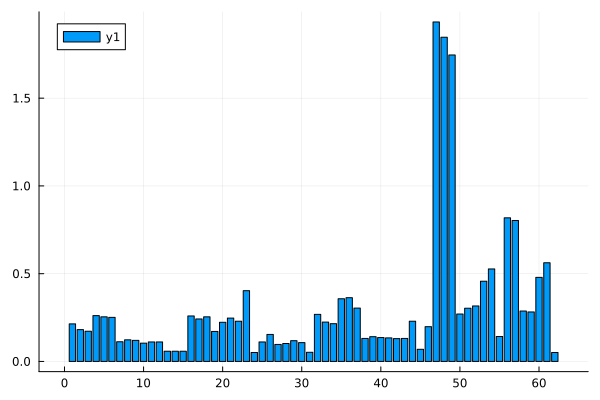

In [144]:
bar(df.OD)

In [145]:
nrow(df)

62

In [147]:
pltdf = unstack(df, [:ID, :msk_id, :shouldswim], :prepost_vortex, :OD);

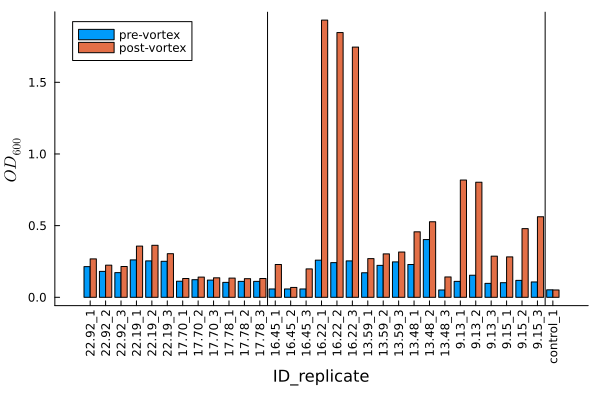

In [148]:
groupedbar(hcat(pltdf.pre_vortex, pltdf.post_vortex),
    ylabel=L"OD_{600}",
    xlabel="ID_replicate",
    label=["pre-vortex" "post-vortex"],
    xticks=(1:31, pltdf.ID),
    grid=false,
    xrotation=90,
    bottommargin=7Plots.Measures.mm,
)
vline!([12.5, 30.5], c=:black, label="")

In [149]:
savefig(joinpath(pdir, "opticaldensity_prepostvortex.pdf"))

"/Users/ben/projects/Doran_etal_2022/plots/Flagellar_test/opticaldensity_prepostvortex.pdf"

In [173]:
oddf = pltdf |> 
    df -> groupby(df, :msk_id) |>
    df -> combine(df, 
        :pre_vortex => mean,
        :pre_vortex => std,
        :post_vortex => mean,
        :post_vortex => std,
    )

Row,msk_id,pre_vortex_mean,pre_vortex_std,post_vortex_mean,post_vortex_std
,String7,Float64,Float64,Float64,Float64
1,22.92,0.189,0.0221133,0.235667,0.0283608
2,22.19,0.255333,0.0051316,0.341333,0.0324705
3,17.70,0.118333,0.00568624,0.136,0.005
4,17.78,0.108667,0.00404145,0.131667,0.00208167
5,16.45,0.058,0.0,0.165333,0.0848548
6,16.22,0.251667,0.00873689,1.84233,0.0940868
7,13.59,0.213667,0.0388501,0.296333,0.0237136
8,13.48,0.227667,0.176004,0.375333,0.205081
9,9.13,0.120667,0.0297041,0.636,0.302336


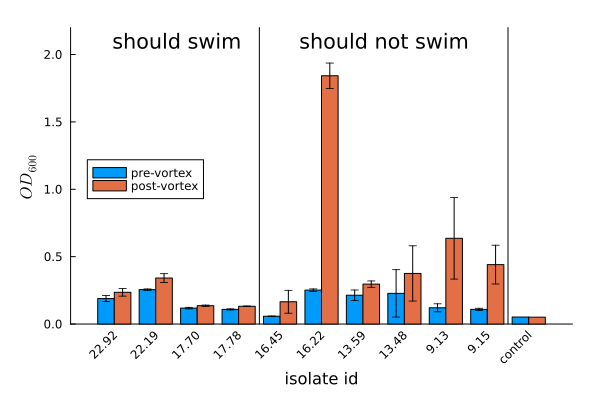

In [191]:
groupedbar(oddf.msk_id, Matrix(oddf[:, [:pre_vortex_mean, :post_vortex_mean]]),
    yerror = Matrix(oddf[:, [:pre_vortex_std, :post_vortex_std]]),
    label=["pre-vortex" "post-vortex"],
    grid=false, xrotation=45,
    ylims=(0, 2.2),
    legend=:left,
    ylabel=L"OD_{600}",
    xlabel="isolate id",
    margin=5Plots.Measures.mm,
)
vline!([4, 10], c=:black, label="")
annotate!([2, 7], [2.1, 2.1], ["should swim", "should not swim"])

In [192]:
savefig(joinpath(pdir, "OD600_by_mskid.pdf"))

"/Users/ben/projects/Doran_etal_2022/plots/Flagellar_test/OD600_by_mskid.pdf"

In [150]:
pdf = pltdf |> 
    df->groupby(df, [:msk_id]) |>
    df->combine(df,
        :shouldswim => first => :shouldswim,
        [:pre_vortex, :post_vortex] => ((pre, post) -> mean(pre ./ post) )=> :OD_ratio_mean,
        [:pre_vortex, :post_vortex] => ((pre, post) -> std(pre ./ post)) => :OD_ratio_std,
    );

In [151]:
tdf = pltdf |> 
    df->transform(df,
        [:pre_vortex, :post_vortex] => ((pre, post) -> pre ./ post )=> :OD_ratio,
);

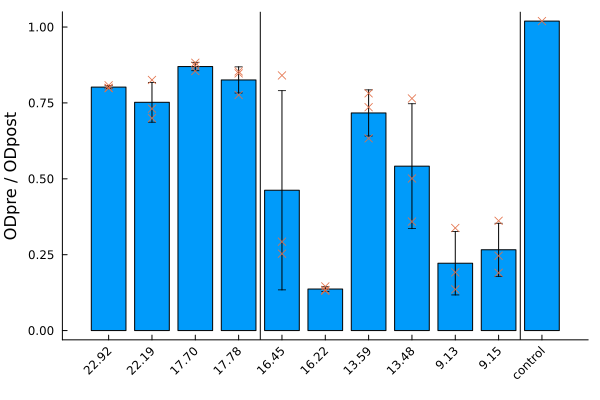

In [152]:
@df pdf bar(:msk_id, :OD_ratio_mean, 
    yerror=:OD_ratio_std,
    xticks=((1:nrow(pdf)) .-0.5, :msk_id),
    grid=false,
    xrotation=45,
    bottommargin=5Plots.Measures.mm,
    label=false,
    ylabel="ODpre / ODpost"
)

@df tdf dotplot!(:msk_id, :OD_ratio, shape=:x, mode=:none, label="", )


vline!([4, 10], c=:black, label="")

In [153]:
savefig(joinpath(pdir, "ODratio_by_mskid.pdf"))

"/Users/ben/projects/Doran_etal_2022/plots/Flagellar_test/ODratio_by_mskid.pdf"

In [154]:
pdf = pltdf |> 
    df->groupby(df, [:shouldswim]) |>
    df->combine(df,
        [:pre_vortex, :post_vortex] => ((pre, post) -> mean(pre ./ post) )=> :OD_ratio_mean,
        [:pre_vortex, :post_vortex] => ((pre, post) -> std(pre ./ post)) => :OD_ratio_std,
    )

Row,shouldswim,OD_ratio_mean,OD_ratio_std
,String7,Float64,Float64
1,yes,0.812497,0.055922
2,no,0.390945,0.251759
3,control,1.01961,NaN


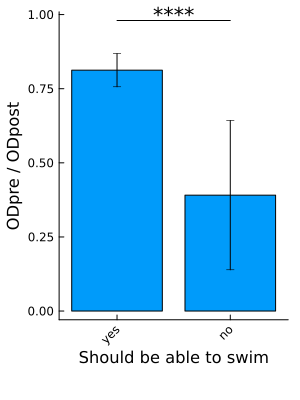

In [168]:
@df pdf[pdf.shouldswim .!= "control", :] bar(:OD_ratio_mean, 
    yerror=:OD_ratio_std,
    xticks=(1:nrow(pdf), :shouldswim),
    grid=false,
    xrotation=45,
    bottommargin=5Plots.Measures.mm,
    label=false,
    ylabel="ODpre / ODpost",
    xlabel="Should be able to swim",
    size=(300, 400),
)
annotate!(1.5, 1, "****")
plot!([(1,.98), (2,.98)], c=:black, label="")

In [169]:
savefig(joinpath(pdir, "Sigtest_shouldswim_yesno_barplot.pdf"))

"/Users/ben/projects/Doran_etal_2022/plots/Flagellar_test/Sigtest_shouldswim_yesno_barplot.pdf"

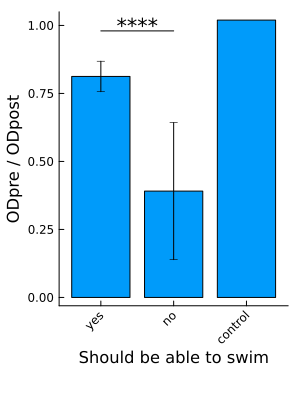

In [166]:
@df pdf bar(:shouldswim, :OD_ratio_mean, 
    yerror=:OD_ratio_std,
    xticks=((0:nrow(pdf)) .+ 0.5, :shouldswim),
    grid=false,
    xrotation=45,
    bottommargin=5Plots.Measures.mm,
    label=false,
    ylabel="ODpre / ODpost",
    xlabel="Should be able to swim",
    size=(300, 400)
)

# @df tdf dotplot!(:shouldswim, :OD_ratio, shape=:x, mode=:none, label="", )

annotate!(1, 1, "****")
plot!([(.5,.98), (1.5,.98)], c=:black, label="")

In [167]:
savefig(joinpath(pdir, "Sigtest_shouldswim_yesnocontrol_barplot.pdf"))

"/Users/ben/projects/Doran_etal_2022/plots/Flagellar_test/Sigtest_shouldswim_yesnocontrol_barplot.pdf"

In [159]:
using HypothesisTests

In [160]:
tdf = pltdf |> 
    df->transform(df,
        [:pre_vortex, :post_vortex] => ((pre, post) -> pre ./ post )=> :OD_ratio,
    );

In [162]:
MannWhitneyUTest(tdf.OD_ratio[tdf.shouldswim .== "yes"], tdf.OD_ratio[tdf.shouldswim .== "no"])

Exact Mann-Whitney U test
-------------------------
Population details:
    parameter of interest:   Location parameter (pseudomedian)
    value under h_0:         0
    point estimate:          0.501393

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           <1e-04

Details:
    number of observations in each group: [12, 18]
    Mann-Whitney-U statistic:             202.0
    rank sums:                            [280.0, 185.0]
    adjustment for ties:                  0.0
